# WeatherPy
----

#### Trends Observed

* The closer to the equator (0 latitude), the higher the temperature.  As you move further away from the equator, the lower the temperature gets.
* On the date the data was pulled, low humidity (under 40%) is found approximately 20 to 40 degrees from the equator.
* For the date the data was pulled, most wind speed was below 8 mph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
from datetime import date

# Import API key
from keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#create lists to hold info we want - temp, humidity, cloudiness, wind speed
temp = []
humid = []
wind_speed = []
clouds = []
city_list = []
lat = []
lon = []
counter = 0

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        city_list.append(city)
        counter+=1
        print(f'Processing City Number {counter} - {city}')
    except (KeyError, IndexError): 
        print("Skipping - city not found")

today = date.today()
today = today.strftime("%m/%d/%y")

Processing City Number 1 - batagay-alyta
Processing City Number 2 - sistranda
Processing City Number 3 - mazamari
Processing City Number 4 - lima
Processing City Number 5 - bredasdorp
Processing City Number 6 - atuona
Processing City Number 7 - punta arenas
Skipping - city not found
Processing City Number 8 - kodumudi
Processing City Number 9 - hilo
Processing City Number 10 - barrow
Processing City Number 11 - boyolangu
Processing City Number 12 - mataura
Processing City Number 13 - leshan
Processing City Number 14 - dunedin
Processing City Number 15 - port hardy
Processing City Number 16 - vaini
Processing City Number 17 - upernavik
Processing City Number 18 - fortuna
Processing City Number 19 - yellowknife
Processing City Number 20 - port hedland
Processing City Number 21 - lorengau
Processing City Number 22 - ushuaia
Processing City Number 23 - souillac
Processing City Number 24 - bathsheba
Processing City Number 25 - goderich
Processing City Number 26 - lubao
Processing City Numbe

Processing City Number 201 - summerside
Processing City Number 202 - georgetown
Processing City Number 203 - thompson
Skipping - city not found
Processing City Number 204 - nizhniy kuranakh
Processing City Number 205 - nome
Processing City Number 206 - ketchikan
Processing City Number 207 - tairua
Processing City Number 208 - mildura
Processing City Number 209 - syamzha
Processing City Number 210 - camacha
Skipping - city not found
Processing City Number 211 - shakiso
Processing City Number 212 - tsiroanomandidy
Skipping - city not found
Processing City Number 213 - kuching
Processing City Number 214 - jamestown
Processing City Number 215 - kidal
Processing City Number 216 - san juan
Processing City Number 217 - acapulco
Processing City Number 218 - kodiak
Processing City Number 219 - aljezur
Processing City Number 220 - mehamn
Processing City Number 221 - pingliang
Processing City Number 222 - sungaipenuh
Processing City Number 223 - sambava
Skipping - city not found
Processing City N

Processing City Number 399 - novyy urgal
Processing City Number 400 - santa maria
Processing City Number 401 - anaconda
Processing City Number 402 - the valley
Processing City Number 403 - samarai
Processing City Number 404 - inverell
Skipping - city not found
Processing City Number 405 - agua verde
Processing City Number 406 - hanzhong
Processing City Number 407 - sukhinichi
Processing City Number 408 - markala
Processing City Number 409 - kavieng
Processing City Number 410 - saint-joseph
Skipping - city not found
Processing City Number 411 - zhigalovo
Skipping - city not found
Skipping - city not found
Processing City Number 412 - funadhoo
Skipping - city not found
Skipping - city not found
Processing City Number 413 - rincon
Skipping - city not found
Processing City Number 414 - wamba
Processing City Number 415 - pavlovka
Processing City Number 416 - gamba
Processing City Number 417 - lethem
Processing City Number 418 - soyo
Processing City Number 419 - kajiado
Processing City Numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city": city_list,
    "temp": temp,
    "humidity": humid,
    "wind": wind_speed,
    "clouds": clouds,
    "latitude": lat,
    "longitude": lon
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,temp,humidity,wind,clouds,latitude,longitude
0,batagay-alyta,0.05,58,0.68,0,67.80,130.41
1,sistranda,9.56,87,7.20,0,63.73,8.83
2,mazamari,4.35,94,0.35,99,-11.33,-74.53
3,lima,17.00,88,4.60,90,-12.06,-77.04
4,bredasdorp,8.81,87,2.10,43,-34.53,20.04


In [5]:
#export to csv
weather_data.to_csv(r'weather_output.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

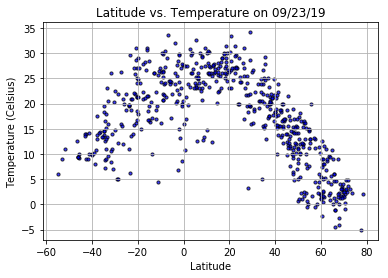

In [13]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)
plt.grid()
plt.title(f"Latitude vs. Temperature on {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")

plt.savefig("Latitude_and_temp.png")

#### Latitude vs. Humidity Plot

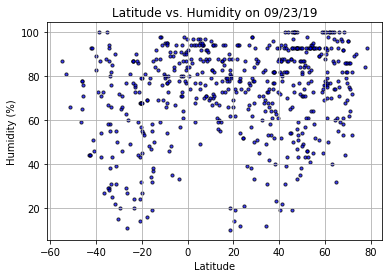

In [14]:
plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)
plt.grid()
plt.title(f"Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Latitude_and_humidity.png")

#### Latitude vs. Cloudiness Plot

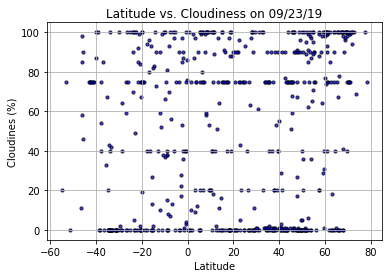

In [15]:
plt.scatter(lat, clouds, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)
plt.grid()
plt.title(f"Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%)")

plt.savefig("Latitude_and_clouds.png")

#### Latitude vs. Wind Speed Plot

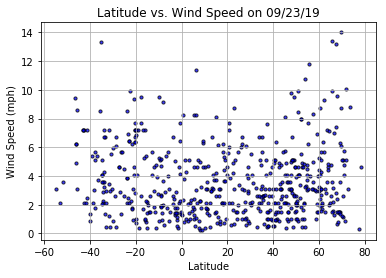

In [16]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)
plt.grid()
plt.title(f"Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Latitude_and_wind.png")